<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-DNN%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-DNN for 4 class classifications based on WSNBFSF dataset**

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset = dataset.dropna() # Remove missing values
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [15]:
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

### **Data Preprocessing**

In [16]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [17]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Hybrid combination of LR-DNN for 4 class classifications**

In [39]:
# Train logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7937093698432098
              precision    recall  f1-score   support

           0       0.78      0.59      0.67     52705
           1       0.71      0.72      0.71     52517
           2       0.83      0.89      0.86     52703
           3       0.85      0.97      0.91     52356

    accuracy                           0.79    210281
   macro avg       0.79      0.79      0.79    210281
weighted avg       0.79      0.79      0.79    210281



In [40]:
# Train DNN model
num_classes = len(np.unique(y))
input_dim = X_train.shape[1]
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=input_dim, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(num_classes, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train_onehot = to_categorical(y_train)
dnn_model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)
dnn_pred = dnn_model.predict(X_test)
dnn_pred = np.argmax(dnn_pred, axis=1)
dnn_acc = accuracy_score(y_test, dnn_pred)
print("DNN Accuracy:", dnn_acc)
print(classification_report(y_test, dnn_pred))

6572/6572 [==============================] - 9s 1ms/step
DNN Accuracy: 0.9855526652431746
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     52705
           1       0.97      0.98      0.98     52517
           2       0.99      1.00      0.99     52703
           3       1.00      0.99      0.99     52356

    accuracy                           0.99    210281
   macro avg       0.99      0.99      0.99    210281
weighted avg       0.99      0.99      0.99    210281



In [41]:
# Combine predictions
lr_probs = lr_model.predict_proba(X_test)
dnn_probs = dnn_model.predict(X_test)
combined_probs = (lr_probs + dnn_probs) / 2
combined_pred = np.argmax(combined_probs, axis=1)
combined_acc = accuracy_score(y_test, combined_pred)
print("Combined Accuracy:", combined_acc)
print(classification_report(y_test, combined_pred))

6572/6572 [==============================] - 9s 1ms/step
Combined Accuracy: 0.9742677655137649
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     52705
           1       0.98      0.95      0.96     52517
           2       0.99      0.99      0.99     52703
           3       0.95      0.99      0.97     52356

    accuracy                           0.97    210281
   macro avg       0.97      0.97      0.97    210281
weighted avg       0.97      0.97      0.97    210281



In [ ]:
# Create confusion matrix for combined model
combined_cm = confusion_matrix(y_test, combined_pred)
print("Combined Model Confusion Matrix:")
print(combined_cm)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [54]:
# Plot confusion matrix for combined model
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ##ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  sns.heatmap(combined_cm, annot=True, fmt='g', cmap='YlGnBu')
  plt.title("Combined Model Confusion Matrix")
  plt.tight_layout()
  plt.show()

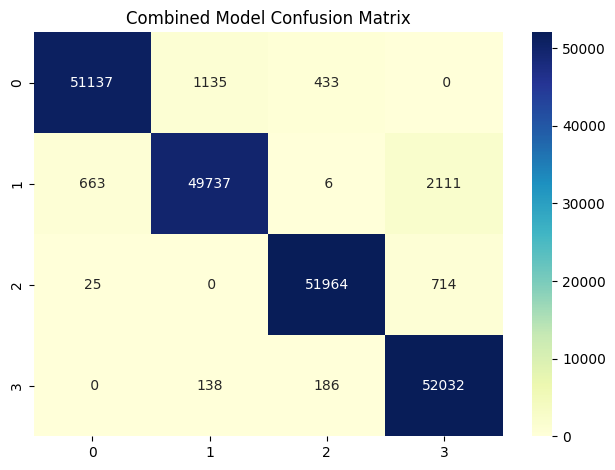

In [53]:
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ##ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
sns.heatmap(combined_cm, annot=True, fmt='2', cmap='YlGnBu')
plt.title("Combined Model Confusion Matrix")
plt.tight_layout()
plt.show()